# Importing the Values

In [1]:
import pandas as pd

import numpy as np

import nltk
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer

import re

import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


# Reading the training data


In [2]:
df=pd.read_csv('fake_news_dataset.csv')


In [3]:
df.shape

(20800, 5)

In [4]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


# Data Cleaning

1) checking for the null values

In [5]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

2) Filling the null values with " "

In [6]:
df = df.fillna('#')

In [7]:
X = df['text'].values
Y = df['label'].values

# Implementing a vectorizer matrix

In [8]:
vectorizer = TfidfVectorizer(stop_words='english',max_df=0.65)
vectorizer.fit(X)
X = vectorizer.transform(X)

# Splitting and testing the dataset

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, stratify=Y, random_state=10)

# Training the model

In [10]:
pc = PassiveAggressiveClassifier(max_iter=60)

In [11]:
pc.fit(X_train,Y_train)

PassiveAggressiveClassifier(max_iter=60)

Predicting the values on the test set and calculate accuracy for Passive Aggressive Classifier 


In [12]:
Y_preds = pc.predict(X_test)
print("ACCURACY : ", metrics.accuracy_score(Y_test, Y_preds)*100)

ACCURACY :  95.60096153846153


Displaying the confusion matrix for Passive Aggressive Classifier

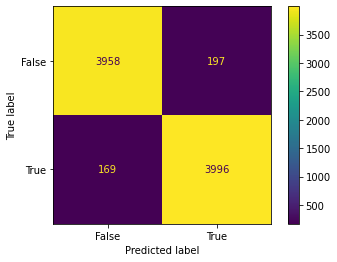

In [13]:
confusion_matrix = metrics.confusion_matrix(Y_test, Y_preds)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# Random forest classifier

1) Training the model

In [14]:
rfc = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=150, n_jobs=-1)

2) Predicting and calculating accuracy for random forest classifier

In [15]:
Y_preds = rfc.predict(X_test)
print("ACCURACY : ", metrics.accuracy_score(Y_test, Y_preds)*100)

ACCURACY :  92.07932692307692


3) Displaying the confusion matrix for Random forest classifier

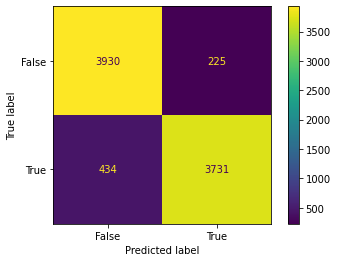

In [16]:
cm = metrics.confusion_matrix(Y_test, Y_preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()